In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 

<span style="font-size:1.1em;">Google Drive'ımızın root pathi</span> ```gdrive/My Drive``` <span style="font-size:1.1em;">oluyor. Proje için gerekli verisetini **mbti** adında bir klasör oluşturup içerisine yüklüyoruz. İlgili verisetinin pathi</span> ```gdrive/My Drive/mbti/all_users.csv``` <span style="font-size:1.1em;">oluyor.</span>

In [0]:
df = pd.read_csv("gdrive/My Drive/mbti/all_users_v2.csv", sep = ';', header = 0) 

In [69]:
df

,user,entry,type,typeClass,I/E,S/N,T/F,J/P
0,19991991,ekşi itiraf sonunda döndüm dolaştım geldim ken...,ENTJ,analysts,E,N,T,J
1,19991991,selda bağcan bu sesi canlı dinleyebilmek benim...,ENTJ,analysts,E,N,T,J
2,19991991,eski sevgilisinin mutlu olmasını isteyen insan...,ENTJ,analysts,E,N,T,J
3,19991991,veda ederken 2019'a bir not bırakmak farklı ac...,ENTJ,analysts,E,N,T,J
4,19991991,ingiliz aksanı bu aralar özellikle bayıldığım ...,ENTJ,analysts,E,N,T,J
...,...,...,...,...,...,...,...,...
643907,zaimoglu,zlatan ibrahimoviç türkiye de katil olur,ESFJ,sentinels,E,S,F,J
643908,zaimoglu,tarihteki en büyük yalancılar şike operasyonu ...,ESFJ,sentinels,E,S,F,J
643909,zaimoglu,akp-chp koalisyonu hayali koalisyondur,ESFJ,sentinels,E,S,F,J
643910,zaimoglu,trabzonlu insana hamsi diyen fenerbahçe taraft...,ESFJ,sentinels,E,S,F,J


In [0]:
import matplotlib.pyplot as plt

<span style="font-size:1.1em;">Verisetinin **class** tiplerine göre dağılımı</span>

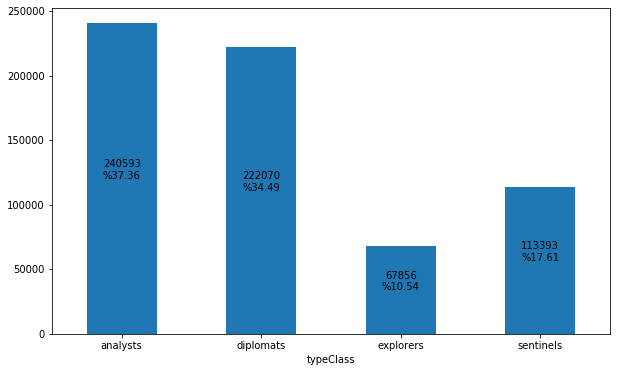

In [71]:
fig = plt.figure(figsize=(10,6))

ax = df.groupby('typeClass').type.count().plot.bar(ylim=0, rot=0)

total_samples = df.shape[0]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/raw_dataset_distribution_typeClass.png')
plt.show()

<span style="font-size:1.1em;">Verisetindeki **I/E** dağılımını göstermektedir. I olanlar x ekseninde 0 olarak E olanlar ise 1 olarak gösterilmektedir</span>

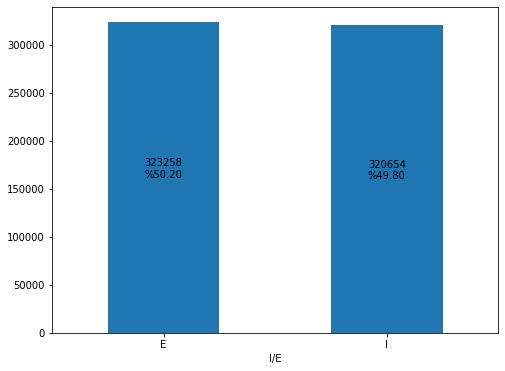

In [72]:
fig = plt.figure(figsize=(8,6))

ax = df.groupby('I/E').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/raw_dataset_distribution_I-E.png')
plt.show()

<span style="font-size:1.1em;">Verisetindeki **S/N** dağılımını göstermektedir. N olanlar x ekseninde 0 olarak S olanlar ise 1 olarak gösterilmektedir</span>

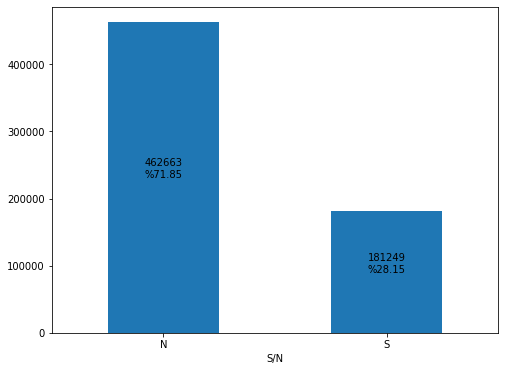

In [73]:
fig = plt.figure(figsize=(8,6))

ax = df.groupby('S/N').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/raw_dataset_distribution_S-N.png')
plt.show()

<span style="font-size:1.1em;">Verisetindeki **T/F** dağılımını göstermektedir. F olanlar x ekseninde 0 olarak T olanlar ise 1 olarak gösterilmektedir</span>

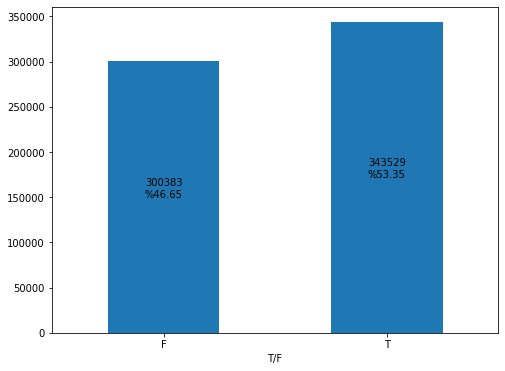

In [74]:
fig = plt.figure(figsize=(8,6))

ax = df.groupby('T/F').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/raw_dataset_distribution_T-F.png')
plt.show()

<span style="font-size:1.1em;">Verisetindeki **J/P** dağılımını göstermektedir. P olanlar x ekseninde 0 olarak J olanlar ise 1 olarak gösterilmektedir</span>

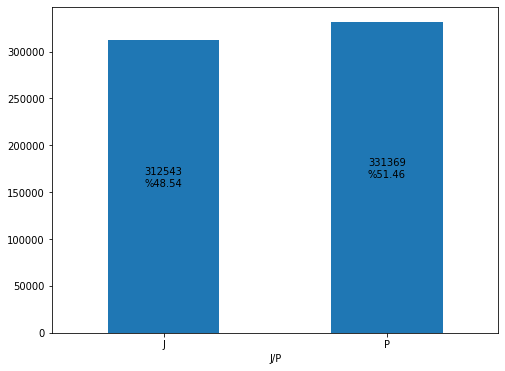

In [75]:
fig = plt.figure(figsize=(8,6))

ax = df.groupby('J/P').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/raw_dataset_distribution_J-P.png')
plt.show()

Aşağıda ise verisetinin 16 farklı MBTI kişilik tiplerine göre dağılımı gösterilmektedir.

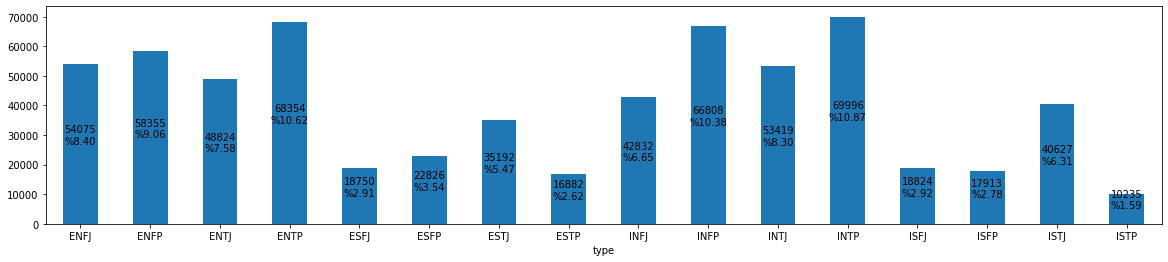

In [77]:
fig = plt.figure(figsize=(20,4))

ax = df.groupby('type').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/raw_dataset_distribution_type.png')
plt.show()

# Elimination

<span style="font-size:1.1em">Bu adımda verisetindeki belli keywordleri içeren entryler verisetinden çıkartılmaktadır.
Bunun nedeni ise bu keywordleri taşıyan entrylerin bir olayı ya da düşünceyi olduğu gibi aktarmasından ötürüdür.
BU tarz entrylerde kullanıcıya ait herhangi bir düşünce ya da öznel bir ifade yer almamaktadır. Örneğin **bkz** içeren entryler başka bir başlığa ya da olaya referans gösterir. **spoiler** içeren entryler bir olayı anlatmaktadır. **#** ile eksisozluk üzerindeki başka bir entrye referans verilir</span>

<span style="font-size:1.1em">Dataframe içerisindeki bütün entrylere '**bkz**', '**spoiler**', '**#**' içerip içermediğine bakar ve bunun sonucu index numarasıyla birlikte döner. ```15 True``` gibi bu demek oluyor ki 15 numaralı index bizim yazmış olduğumuz koşulu sağlamaktadır.</span>

In [0]:
indexes_contains_unwanted_words = df['entry'].str.contains('|'.join(['bkz', 'spoiler', r'#\d*']))

<span style="font-size:1.1em">Dataframe'den ilgili entryler çıkartılır</span>

In [79]:
df = df[~indexes_contains_unwanted_words]

df['entry']

0         ekşi itiraf sonunda döndüm dolaştım geldim ken...
1         selda bağcan bu sesi canlı dinleyebilmek benim...
2         eski sevgilisinin mutlu olmasını isteyen insan...
3         veda ederken 2019'a bir not bırakmak farklı ac...
4         ingiliz aksanı bu aralar özellikle bayıldığım ...
                                ...                        
643907            zlatan ibrahimoviç türkiye de katil olur 
643908    tarihteki en büyük yalancılar şike operasyonu ...
643909              akp-chp koalisyonu hayali koalisyondur 
643910    trabzonlu insana hamsi diyen fenerbahçe taraft...
643911    caner taslaman zonguldak taki paneline katılma...
Name: entry, Length: 524840, dtype: object

<span style="font-size:1.1em">Verisetinin son hali kaydedilir</span>

In [0]:
df.to_csv("gdrive/My Drive/mbti/elimanated_all_users_v2.csv", sep=';', encoding='utf-8', index=False)

<span style="font-size:1.1em;">Verisetinin **class** tiplerine göre dağılımı</span>

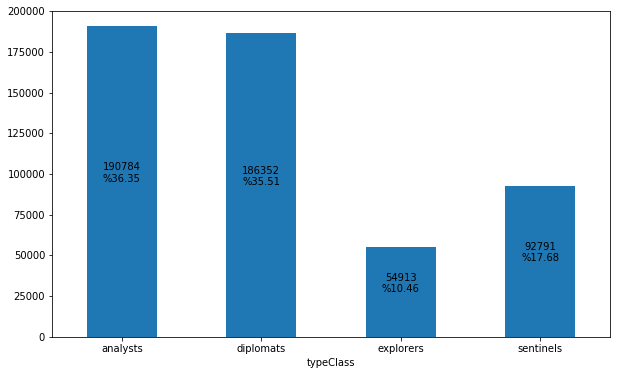

In [81]:
fig = plt.figure(figsize=(10,6))

ax = df.groupby('typeClass').type.count().plot.bar(ylim=0, rot=0)

total_samples = df.shape[0]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/eliminated_dataset_distribution_typeClass.png')
plt.show()

<span style="font-size:1.1em;">Verisetindeki **I/E** dağılımını göstermektedir. I olanlar x ekseninde 0 olarak E olanlar ise 1 olarak gösterilmektedir</span>

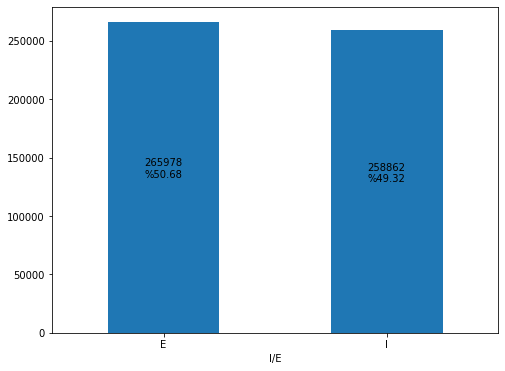

In [82]:
fig = plt.figure(figsize=(8,6))

ax = df.groupby('I/E').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/eliminated_dataset_distribution_I-E.png')
plt.show()

<span style="font-size:1.1em;">Verisetindeki **S/N** dağılımını göstermektedir. N olanlar x ekseninde 0 olarak S olanlar ise 1 olarak gösterilmektedir</span>

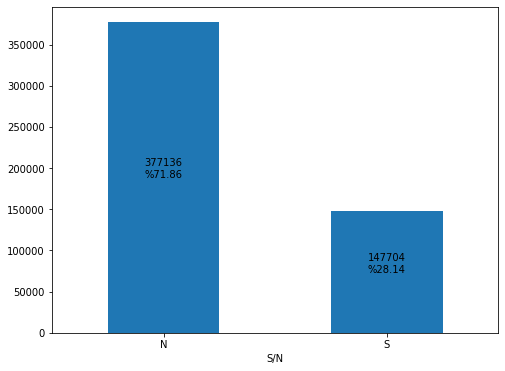

In [83]:
fig = plt.figure(figsize=(8,6))

ax = df.groupby('S/N').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/eliminated_distribution_S-N.png')
plt.show()

<span style="font-size:1.1em;">Verisetindeki **T/F** dağılımını göstermektedir. F olanlar x ekseninde 0 olarak T olanlar ise 1 olarak gösterilmektedir</span>

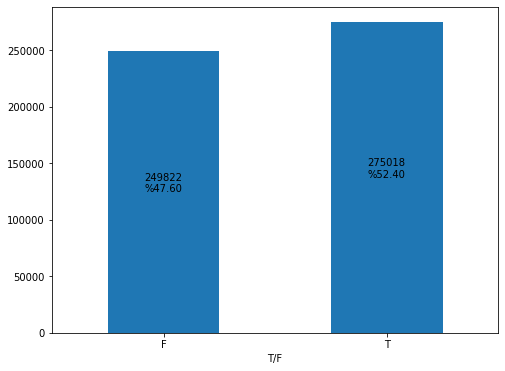

In [84]:
fig = plt.figure(figsize=(8,6))

ax = df.groupby('T/F').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/eliminated_dataset_distribution_T-F.png')
plt.show()

<span style="font-size:1.1em;">Verisetindeki **J/P** dağılımını göstermektedir. P olanlar x ekseninde 0 olarak J olanlar ise 1 olarak gösterilmektedir</span>

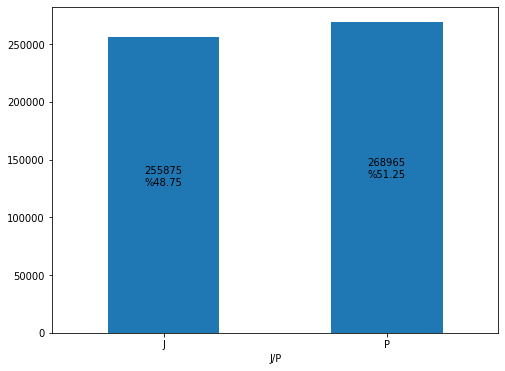

In [85]:
fig = plt.figure(figsize=(8,6))

ax = df.groupby('J/P').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/eliminated_dataset_distribution_J-P.png')
plt.show()

Aşağıda ise verisetinin 16 farklı MBTI kişilik tiplerine göre dağılımı gösterilmektedir.

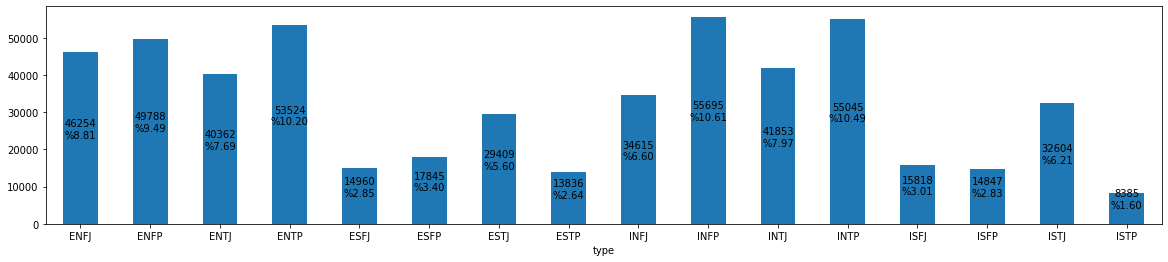

In [86]:
fig = plt.figure(figsize=(20,4))

ax = df.groupby('type').type.count().plot.bar(ylim=0, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}\n%{:.2f}'.format(height, 100*height/total_samples), xy=(p.get_x() + p.get_width() / 2, height/2),  ha = 'center')

plt.savefig('gdrive/My Drive/mbti/eliminated_dataset_distribution_type.png')
plt.show()